## -----------------------Inter-Quartile-Range----------------------

In [13]:
# Importations

import pandas as pd
import numpy as np

In [14]:
df = pd.DataFrame({
    "name": ["mohan", "maria", "sakib", "tao", "virat", "khusubu", "dmitry",
             "selena", "john", "imran", "jose", "deepika", "yoseph", "binod",
             "gulshan", "johnson", "donald", "aamir", "ken", "Liu"],
    "height": [1.2, 2.3, 4.9, 5.1, 5.2, 5.4, 5.5, 5.5, 5.6, 5.6, 5.8, 5.9, 6, 6.1, 6.2, 6.5, 7.1, 14.5, 23.2, 40.2]
})
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusubu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [15]:
# Summary statistics

df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


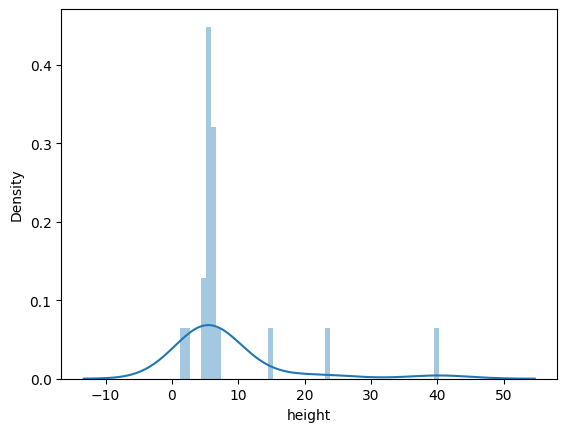

In [36]:
# Plotting the distribution

import seaborn as sns
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.distplot(df["height"])

In [16]:
# Getting the quartiles

Q1 = df.height.quantile(0.25)
Q2 = df.height.quantile(0.50)
Q3 = df.height.quantile(0.75)
Q1, Q2, Q3

(5.3500000000000005, 5.699999999999999, 6.275)

In [17]:
# Getting the inter-quartile range 

IQR = Q3 - Q1
IQR

0.9249999999999998

In [18]:
# Getting the upper limit and lower limit

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

lower_limit, upper_limit

(3.962500000000001, 7.6625)

In [27]:
# Reducing the precision

lower_limit = round(lower_limit, 6)
upper_limit = round(upper_limit, 6)

In [29]:
# Checking outliers 

df[(df.height < lower_limit) | (df.height > upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [32]:
# Getting the new dataframe with no outliers - negation

new_df = df[~((df.height < lower_limit) | (df.height > upper_limit))]
new_df

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusubu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


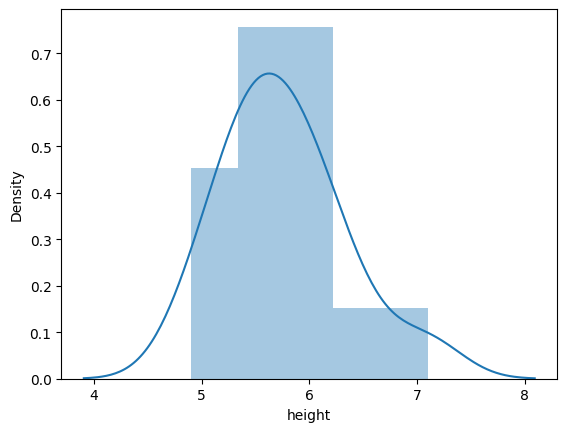

In [38]:
# Plotting the distribution of the new dataframe

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.distplot(new_df["height"])